In [1]:
import sys; sys.path.append("..")
from epi_model import *

In [3]:
import pickle
import os

ms = dict()

for f in Path(".").glob("full_run_*.pickle"):
    if not os.path.getsize(f):
        continue
    with f.open('rb') as inf:
        ms_m = pickle.load( inf )
        for k,v in ms_m.items():
            ms[k] = v

In [6]:
sorted(set(x[-1] for x in ms.keys()))

['friend',
 'friendClose',
 'friendCloseChain',
 'friendCloseChain_5',
 'friendHighDeg',
 'friendHighDegClose',
 'friendHighDegCloseChain',
 'friendWeighted',
 'friendWeightedChain',
 'local_betweenness',
 'nominate_local_betweenness',
 'none',
 'rand',
 'targeted']

In [7]:
len(ms)

252

In [8]:
strats = [
    ('friend', 'nomination (random)'),
    ('friendClose', 'nomination (random, close)'),
    ('friendHighDeg', 'nomination (degree)'),
    ('friendHighDegClose', 'nomination (degree, close)'),
    ('nominate_local_betweenness', 'nomination (local betweenness)'),
    ('local_betweenness', 'local betweenness'),
    ('targeted', 'degree'),
    ('rand', 'random'),
    ('none', 'no intervention'),
]

In [9]:
statsd = dict(strats)

In [10]:
K, KN = list(zip(*strats))

In [11]:
ms_d = {}

In [12]:
rows = []

def met(x):
    return x['inf'][-1] + x['exp'][-1] + x['rec'][-1]

for (tnet, s2e, n_vacc, name), m in sorted(ms.items()):
    xs = [met(x) for x in m]
    
    mn = np.mean(xs)
    sd = np.std(xs)
    
    mx = max([met(x) for x in m])
    
    ms_d[ (tnet, s2e, n_vacc, name) ] = [mn,mx,sd]
    
    if name not in statsd:
        continue
    
    rows.append([
        tnet, s2e, n_vacc, statsd[name],
        f"{mn:0.1f} +/- {1.96 * sd / np.sqrt(len(xs)):0.1f}",mx
    ])

In [13]:
from tabulate import tabulate

In [14]:
display(HTML(tabulate(rows, tablefmt='html')))

0,0.05,0.05,nomination (random),41.6 +/- 1.0,68
0,0.05,0.05,"nomination (random, close)",40.7 +/- 1.1,67
0,0.05,0.05,nomination (degree),40.1 +/- 1.0,63
0,0.05,0.05,"nomination (degree, close)",41.6 +/- 1.2,66
0,0.05,0.05,local betweenness,38.9 +/- 1.0,58
0,0.05,0.05,nomination (local betweenness),41.0 +/- 1.1,74
0,0.05,0.05,no intervention,44.6 +/- 1.3,75
0,0.05,0.05,random,41.9 +/- 1.2,73
0,0.05,0.05,degree,38.9 +/- 1.0,62
0,0.05,0.1,nomination (random),40.1 +/- 1.0,65
0,0.05,0.1,"nomination (random, close)",38.0 +/- 0.9,57


In [15]:
sorted(ms)[:5]

[(0, 0.05, 0.05, 'friend'),
 (0, 0.05, 0.05, 'friendClose'),
 (0, 0.05, 0.05, 'friendCloseChain'),
 (0, 0.05, 0.05, 'friendCloseChain_5'),
 (0, 0.05, 0.05, 'friendHighDeg')]

In [20]:
types = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

In [22]:
from itertools import groupby
grps = groupby(sorted(ms.items()), key=lambda x:list(x[0])[:-1])

In [23]:
grps = [ (a, list(b)) for a,b in grps ]

In [24]:
to_show = ['rand', 'friend', 'friendHighDeg', 'local_betweenness', 'none']

In [25]:
order = range(100)

In [26]:
order = list(np.argsort([
    np.mean([v[0] for kk,v in ms_d.items() if kk[-1]==k]) 
    for k in to_show
]))

In [27]:
# geesh everything is mixed...
#to_show = sorted(to_show, key=lambda k:-np.mean([v[0] for kk,v in ms_d.items() if kk[-1]==k]))

In [40]:
"""
['friend',
 'friendClose',
 'friendCloseChain',
 'friendCloseChain_5',
 'friendHighDeg',
 'friendHighDegClose',
 'friendHighDegCloseChain',
 'friendWeighted',
 'friendWeightedChain',
 'local_betweenness',
 'nominate_local_betweenness',
 'none',
 'rand',
 'targeted']
"""

to_show = ['none', 'rand', 'friend', 'friendHighDegClose', 'friendHighDeg', 'friendHighDegClose','friendHighDegCloseChain','friendCloseChain', 'friendCloseChain_5', 'friendWeighted', 'local_betweenness']

In [29]:
from matplotlib import patches

In [30]:
alph = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnop'

In [31]:
Nnodesx = [310, 784]

def met_rel(k):
    Nn = Nnodesx[k[0]]
    Nvac = int(Nn * k[2])
    
    return np.mean( [x['inf'][-1] + x['exp'][-1] + x['rec'][-1] for x in ms[k]] ) / ( Nn - Nvac - 20 )

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


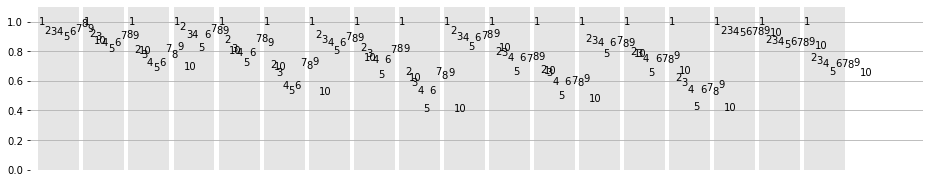

In [32]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1 + i*0.15, met_rel(k) / base
        plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        #plt.scatter(x,y+0.1, s=5, color='black', edgecolors=None)
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.2)
plt.ylim(0,1.1)
plt.grid(True, 'major','y')
plt.xticks([]);

In [120]:
types = ['o', '*','s', 'v', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


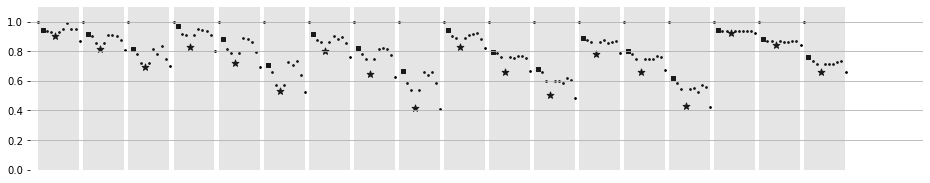

In [41]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

plt.grid(True, 'major','y')

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1 + i*0.101, met_rel(k) / base
        #plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        plt.scatter(x,y, s=3, color='black', edgecolors=None)
        if i in {1,4}:
            plt.scatter(x,y, s=[20,50][[1,4].index(i)], color='black', edgecolors=None, marker=['s','*'][[1,4].index(i)])
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.2)
plt.ylim(0,1.1)
plt.xticks([]);

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


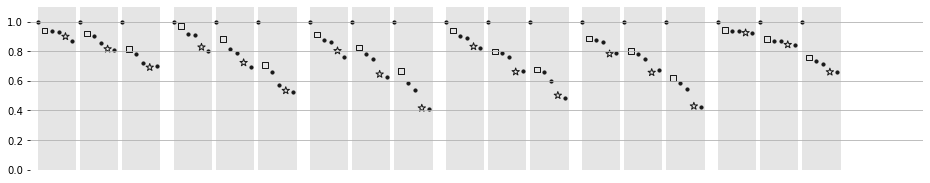

In [137]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

col_spacing = 0.25

plt.grid(True, 'major','y')

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1+(col//3)*col_spacing + i*0.18, met_rel(k) / base
        #plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        if i in {1,4}:
            plt.scatter(x,y, s=[30,60][[1,4].index(i)], color='none', edgecolors='black', marker=['s','*'][[1,4].index(i)])
        else:
            plt.scatter(x,y, s=10, color='black', edgecolors=None)
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1+((col-1)//3)*col_spacing, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.2+(col//3)*col_spacing)
plt.ylim(0,1.1)
plt.xticks([]);

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


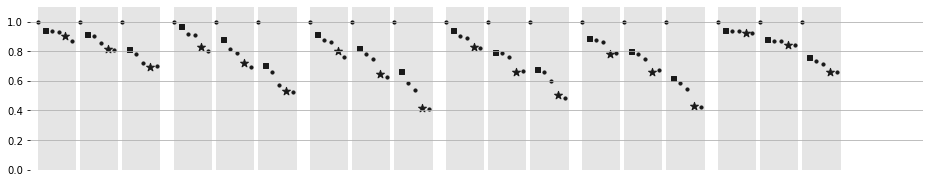

In [143]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

col_spacing = 0.25

plt.grid(True, 'major','y')

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1+(col//3)*col_spacing + i*0.18, met_rel(k) / base
        #plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        if i in {1,4}:
            plt.scatter(x,y, s=[25,70][[1,4].index(i)], color='black', edgecolors='black', marker=['s','*'][[1,4].index(i)])
        else:
            plt.scatter(x,y, s=10, color='black', edgecolors=None)
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1+((col-1)//3)*col_spacing, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.2+(col//3)*col_spacing)
plt.ylim(0,1.1)
plt.xticks([]);

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


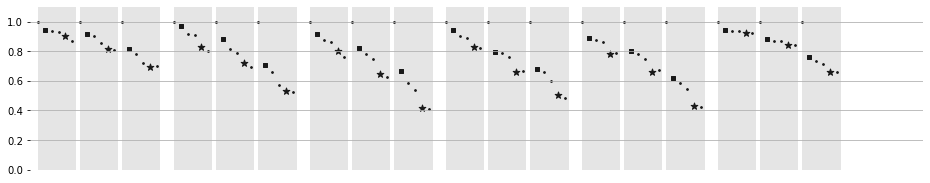

In [133]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

col_spacing = 0.25

plt.grid(True, 'major','y')

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.1+(col//3)*col_spacing + i*0.18, met_rel(k) / base
        #plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        plt.scatter(x,y, s=3, color='black', edgecolors=None)
        if i in {1,4}:
            plt.scatter(x,y, s=[20,50][[1,4].index(i)], color='black', edgecolors=None, marker=['s','*'][[1,4].index(i)])
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.1+((col-1)//3)*col_spacing, 0), 1, 1.1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.2+(col//3)*col_spacing)
plt.ylim(0,1.1)
plt.xticks([]);

[0, 0.05, 0.05]
[0, 0.05, 0.1]
[0, 0.05, 0.2]
[0, 0.1, 0.05]
[0, 0.1, 0.1]
[0, 0.1, 0.2]
[0, 0.2, 0.05]
[0, 0.2, 0.1]
[0, 0.2, 0.2]
[1, 0.05, 0.05]
[1, 0.05, 0.1]
[1, 0.05, 0.2]
[1, 0.1, 0.05]
[1, 0.1, 0.1]
[1, 0.1, 0.2]
[1, 0.2, 0.05]
[1, 0.2, 0.1]
[1, 0.2, 0.2]


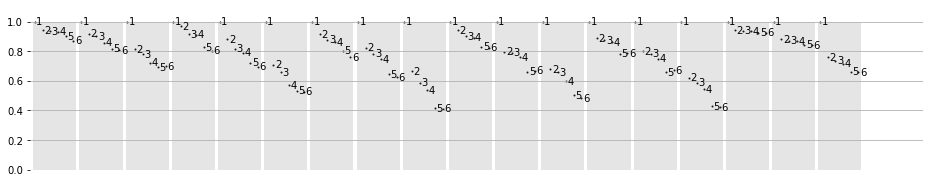

In [110]:
fig = plt.figure(figsize=(16,3))
ax = plt.axes()
plt.box(False)

col = 0
for a,b in sorted( grps, key=lambda x:x[0] )[:30]:
    base_k = tuple( a + ['none'] )
    if base_k not in ms_d:
        continue
        
    print(a)
        
    #base = #ms_d[base_k][0]
    base = met_rel(base_k)
    for i,kk in enumerate(to_show):            
        k = tuple(a + [kk])
            
        x,y = col*1.5 + i*0.25, met_rel(k) / base
        plt.text(x,y, str(i+1), verticalalignment='center')#, marker=types[i])
        #plt.scatter(x,y,c=)
        plt.scatter(x-0.05,y, s=1, color='black', edgecolors=None)
        
    col += 1
    #print(i)
    
    rect = patches.Rectangle(
        ((col-1)*1.5-0.1, 0), 1.4, 1, 
        linewidth=1, 
        edgecolor='none', facecolor='grey', alpha=0.2)
    #plt.scatter(2,0.5)
    # Add the patch to the Axes
    ax.add_patch(rect)
    #plt.text((col-1.1/2)*1.1, -0.1, alph[col-1])
    #print(alph[col-1])
    
plt.xlim(-0.2,col*1.6)
plt.ylim(0,1.1)
plt.grid(True, 'major','y')
plt.xticks([]);

In [78]:
[x[0] for x in b]

[(0, 0.05, 15, 'rand_0'),
 (0, 0.05, 15, 'friend_1'),
 (0, 0.05, 15, 'friendHighDeg_2'),
 (0, 0.05, 15, 'targeted_3'),
 (0, 0.05, 15, 'local_betweenness_4'),
 (0, 0.05, 15, 'nominate_local_betweenness_5'),
 (0, 0.05, 15, 'none_6')]

In [5]:
tnets = sorted(set(x[0] for x in ms.keys()))
s2es = sorted(set(x[1] for x in ms.keys()))
n_vaccs = sorted(set(x[2] for x in ms.keys()))
names = sorted(set(x[3] for x in ms.keys()))

In [6]:
(tnets,s2es,n_vaccs,names)

([0, 1],
 [0.05, 0.1, 0.15, 0.2],
 [15, 31, 39, 46, 62, 78, 117, 156],
 ['friendHighDeg_2',
  'friend_1',
  'local_betweenness_4',
  'nominate_local_betweenness_5',
  'none_6',
  'rand_0',
  'targeted_3'])

In [7]:
k, v = list(ms.items())[0]

# percentage differences

In [144]:
from itertools import groupby
grps = groupby(ms.items(), key=lambda x:list(x[0])[:-1])

In [145]:
grps = [ (a, list(b)) for a,b in grps ]

In [146]:
grps[0][1][0][0]

(0, 0.2, 0.05, 'friend')

In [147]:
set(x[-1] for x in ms.keys())

{'friend',
 'friendClose',
 'friendHighDeg',
 'friendHighDegClose',
 'local_betweenness',
 'nominate_local_betweenness',
 'none',
 'rand',
 'targeted'}

In [148]:
to_show = ['none', 'rand', 'friend', 'nominate_local_betweenness', 'targeted', 'friendHighDeg']

In [149]:
#mat = np.zeros(  )

mat = np.zeros( (len(to_show),len(grps)) ) 

for i, (kk,gg) in enumerate(grps):
    for ki,k in enumerate(to_show):
        my_key = tuple(kk+[k])
        if my_key not in ms_d:
            continue
        mat[ki,i] = ms_d[my_key][0]            

In [150]:
mat.shape

(6, 155)

In [151]:
len(to_show)

6

In [152]:
mat[0,:]

array([165.495,  44.59 ,  80.025, 420.04 , 688.205, 123.155, 165.495,
        44.59 ,  80.025, 165.495, 163.215,  44.59 ,  80.025, 163.215,
        44.48 ,  79.59 , 163.92 ,  44.48 ,  79.59 , 163.92 ,  44.48 ,
        79.59 ,  82.475,  45.1  ,  82.475,  45.1  ,  82.475, 688.205,
       420.04 , 123.155, 688.205, 420.04 , 123.155, 689.22 , 412.13 ,
       130.155, 689.22 , 412.13 , 130.155, 689.22 , 412.13 , 130.155,
       689.275, 413.185, 128.47 , 689.275, 413.185, 689.275, 413.185,
       128.47 ,  80.025, 165.495,  44.59 , 420.04 , 688.205, 123.155,
       165.495,  44.59 ,  80.025, 163.215,  44.48 ,  79.59 , 163.92 ,
        44.48 , 163.92 ,  79.59 ,  45.1  ,  82.475,  45.1  ,  82.475,
       688.205, 420.04 , 123.155, 689.22 , 412.13 , 130.155, 689.22 ,
       412.13 , 130.155, 689.275, 413.185, 128.47 , 689.275, 413.185,
       128.47 , 165.495,  44.59 ,  80.025, 420.04 , 688.205, 123.155,
       165.495,  44.59 ,  80.025, 163.215,  79.59 ,  44.48 , 163.92 ,
        44.48 ,  79.

In [153]:
divs = (mat / mat[0,:]).T

In [154]:
divs.shape

(155, 6)

In [155]:
wid,hei = divs.shape

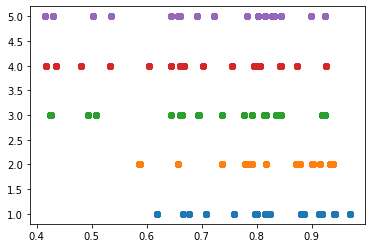

In [156]:
for i in range(1,hei):
    plt.scatter(divs[:,i], [i]*wid)

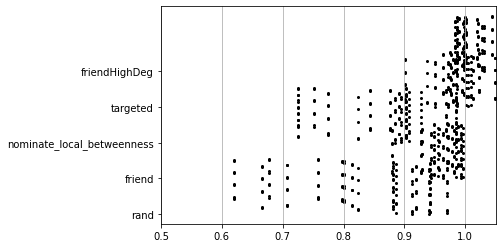

In [157]:
from random import random

for i in range(1,hei):
    plt.scatter(mat[i,:] / mat[i-1,:], [i + ij*0.01 for ij in range(wid)],
               s=4, color='black')
plt.yticks(range(1,hei), to_show[1:])
plt.xlim(0.5,1.05)
plt.grid(True,'major','x')

# just simple stuff...

In [97]:
basek = [0,0.2,0.2]

In [43]:
Nnodesx = [310, 784]

def met_rel(k):
    Nn = Nnodesx[k[0]]
    Nvac = int(Nn * k[2])
    
    if k[-1] == 'none':
        Nvac = 0
    
    return np.mean( [x['inf'][-1] + x['exp'][-1] + x['rec'][-1] for x in ms[k]] ) / ( Nn - Nvac - 20 )

def met_rel_num(k):
    Nn = Nnodesx[k[0]]
    Nvac = int(Nn * k[2])
    
    if k[-1] == 'none':
        Nvac = 0
    
    return np.mean( [x['inf'][-1] + x['exp'][-1] + x['rec'][-1] for x in ms[k]] ), ( Nn - Nvac - 20 )

In [44]:
def err(kk):
    k = tuple( basek+[kk] )
    return np.std( [x['inf'][-1] + x['exp'][-1] + x['rec'][-1] for x in ms[k]] ) / np.sqrt(len(ms[k]))

In [45]:
def getit(kk):
    return met_rel(tuple( basek+[kk] ))

In [46]:
def getit_num(kk):
    return met_rel_num(tuple( basek+[kk] ))

In [31]:
display(Markdown(f"""
Distributing vaccines randomly to 20% of the population 
does have some effect on the spread of this disease. 
On average, it reduces the number of infections 
among the unvaccinated from 
    {getit('none'):0.1%} to {getit('rand'):0.1%}.
"""))


Distributing vaccines randomly to 20% of the population 
does have some effect on the spread of this disease. 
On average, it reduces the number of infections 
among the unvaccinated from 
    56.5% to 47.9%.


In [22]:
display(Markdown(f"""
In this school, 
    vaccinating random contacts of random individuals 
    reduces the average number of infections among the unvaccinated from 
    {getit('rand'):0.1%} (*random vaccination*) to {getit('friend'):0.1%}.
"""))


In this school, 
    vaccinating random contacts of random individuals 
    reduces the average number of infections among the unvaccinated from 
    47.9% (*random vaccination*) to 42.1%.


In [107]:
basek

[0, 0.2, 0.2]

In [108]:
getit('none')

0.5652413793103448

In [109]:
getit_num('none')

(163.92, 290)

In [110]:
getit_num('rand')

(109.2, 228)

In [111]:
100 * err('none') / 290

0.5366716025996353

In [112]:
getit('rand')

0.4789473684210526

In [105]:
getit_num('rand')

(109.2, 228)

In [103]:
100 * err('rand') / 228

0.5971439282428

In [113]:
getit('targeted')

0.3003728070175439

In [114]:
100 * err('targeted') / 228

0.39920687253297926

In [116]:
getit('friend')

0.42098684210526316

In [117]:
100 * err('friend') / 228

0.5265302697120587

In [48]:
100 * err('friend') / 228

0.41396172929086

In [118]:
getit('friendWeighted')

0.4191885964912281

In [119]:
100 * err('friendWeighted') / 228

0.5331377820961187

In [54]:
getit_num('friendHighDeg')

(68.21, 228)

In [120]:
getit('friendHighDeg')

0.29916666666666664

In [121]:
100 * err('friendHighDeg') / 290

0.3167405154101054

In [124]:
100*(1 - getit('rand') / getit('none'))

15.266754000667849

In [125]:
100*(1 - getit('friendHighDeg') / getit('none'))

47.07275906946479

In [23]:
display(Markdown(f"""
reduces the average number of infections among the unvaccinated from 
    {getit('rand'):0.1%} (*random vaccination*) to just {getit('friendHighDeg'):0.1%}.
"""))


reduces the average number of infections among the unvaccinated from 
    47.9% (*random vaccination*) to just 29.9%.


In [24]:
getit_num('none')

(163.92, 290)

In [29]:
err('none')

1.5563476475389424

# let's go to texas

In [57]:
basek = [1,0.2,0.2]

In [74]:
getit_num('none')

(689.275, 764)

In [76]:
getit('none')

0.9021924083769634

In [78]:
100 * err('none') / 764

0.08408062313996313

In [79]:
getit('rand')

0.8597450657894737

In [84]:
getit_num('rand')

(522.725, 608)

In [88]:
100 * err('rand') / 608

0.17909869241215806

In [89]:
100 * err('targeted') / 608

0.34451630443758285

In [90]:
100 * err('friend') / 608

0.1854959848293532

In [91]:
100 * err('friend') / 608

0.1854959848293532

In [92]:
getit('friendWeighted')

0.8327549342105263

In [93]:
100 * err('friendWeighted') / 608

0.18595194817175073

In [94]:
getit_num('friendHighDeg')

(454.815, 608)

In [95]:
getit('friendHighDeg')

0.7480509868421052

In [96]:
100 * err('friendHighDeg') / 608

0.3943615909276939

In [69]:
display(Markdown(f"""
reduces the average number of infections among the unvaccinated from 
    {getit('rand'):0.1%} (*random vaccination*) to just {getit('friendHighDeg'):0.1%}.
"""))


reduces the average number of infections among the unvaccinated from 
    86.0% (*random vaccination*) to just 74.8%.


In [70]:
getit_num('none')

(689.275, 764)

In [71]:
err('none')

0.6423759607893184